In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
data = pd.read_csv("kaggle/input/spaceship-titanic/train.csv")

In [3]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:xlabel='VIP'>

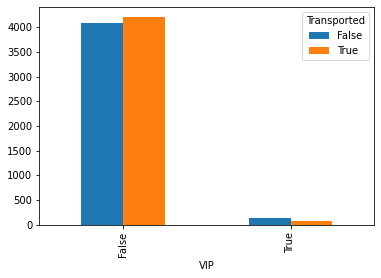

In [4]:
pd.crosstab(data.VIP,data.Transported).plot(kind="bar")

<AxesSubplot:xlabel='HomePlanet'>

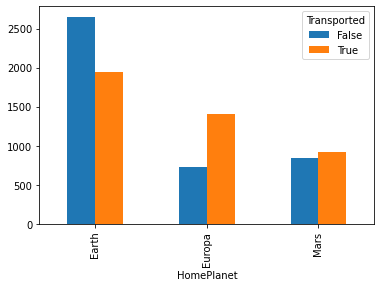

In [5]:
pd.crosstab(data.HomePlanet,data.Transported).plot(kind="bar")

<AxesSubplot:xlabel='Age'>

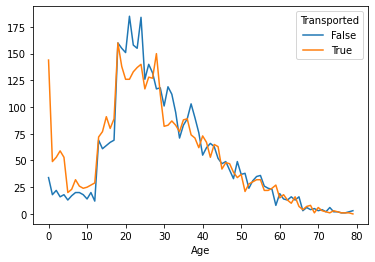

In [6]:
pd.crosstab(data.Age,data.Transported).plot()

<AxesSubplot:xlabel='CryoSleep'>

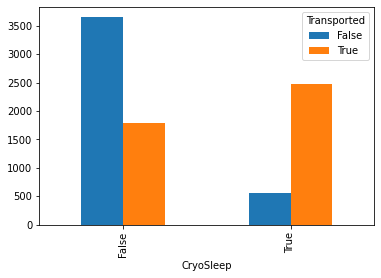

In [7]:
pd.crosstab(data.CryoSleep,data.Transported).plot(kind="bar")

<AxesSubplot:xlabel='Destination'>

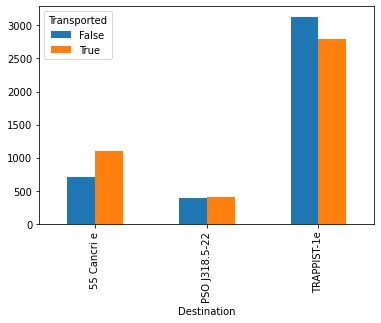

In [8]:
pd.crosstab(data.Destination,data.Transported).plot(kind="bar")

In [9]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [10]:
data = data.drop(['PassengerId','Cabin','Age','VIP','RoomService','FoodCourt',"ShoppingMall","Spa","VRDeck","Name"],axis="columns")

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data.HomePlanet = encoder.fit_transform(data['HomePlanet'])
data.CryoSleep = encoder.fit_transform(data['CryoSleep'])
data.Destination = encoder.fit_transform(data['Destination'])
data.Transported = encoder.fit_transform(data['Transported'])

In [12]:
data.head()

,HomePlanet,CryoSleep,Destination,Transported
0,1,0,2,0
1,0,0,2,1
2,1,0,2,0
3,1,0,2,0
4,0,0,2,1


In [13]:
target = data['Transported']
data = data.drop(['Transported'],axis="columns")
data.head()

,HomePlanet,CryoSleep,Destination
0,1,0,2
1,0,0,2
2,1,0,2
3,1,0,2
4,0,0,2


In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier(n_estimators=10)
model.fit(data,target)

RandomForestClassifier(n_estimators=10)

In [16]:
test_data = pd.read_csv("kaggle/input/spaceship-titanic/test.csv")
test_passengerId = test_data['PassengerId']
test_data = test_data.drop(['PassengerId','Cabin','Age','VIP','RoomService','FoodCourt',"ShoppingMall","Spa","VRDeck","Name"],axis="columns")
test_data.HomePlanet = encoder.fit_transform(test_data['HomePlanet'])
test_data.CryoSleep = encoder.fit_transform(test_data['CryoSleep'])
test_data.Destination = encoder.fit_transform(test_data['Destination'])

In [17]:
predicted_data = model.predict(test_data)
predicted_data

array([1, 0, 1, ..., 1, 0, 1])

In [18]:
submitData = pd.DataFrame(data={"PassengerId": test_passengerId,"Transported":predicted_data})

In [19]:
submitData.to_csv("submission.csv")